In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Allows to see up to 500 columns within notebook
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)



In [2]:
pickle_in = open("df_pickle.pkl","rb")
df = pickle.load(pickle_in)
type(df)

pandas.core.frame.DataFrame

In [22]:
df.head()
df.DAYS_BIRTH.describe()

count    10000.000000
mean        43.904858
std         11.891860
min         21.109589
25%         33.941781
50%         43.242466
75%         53.685616
max         68.931507
Name: DAYS_BIRTH, dtype: float64

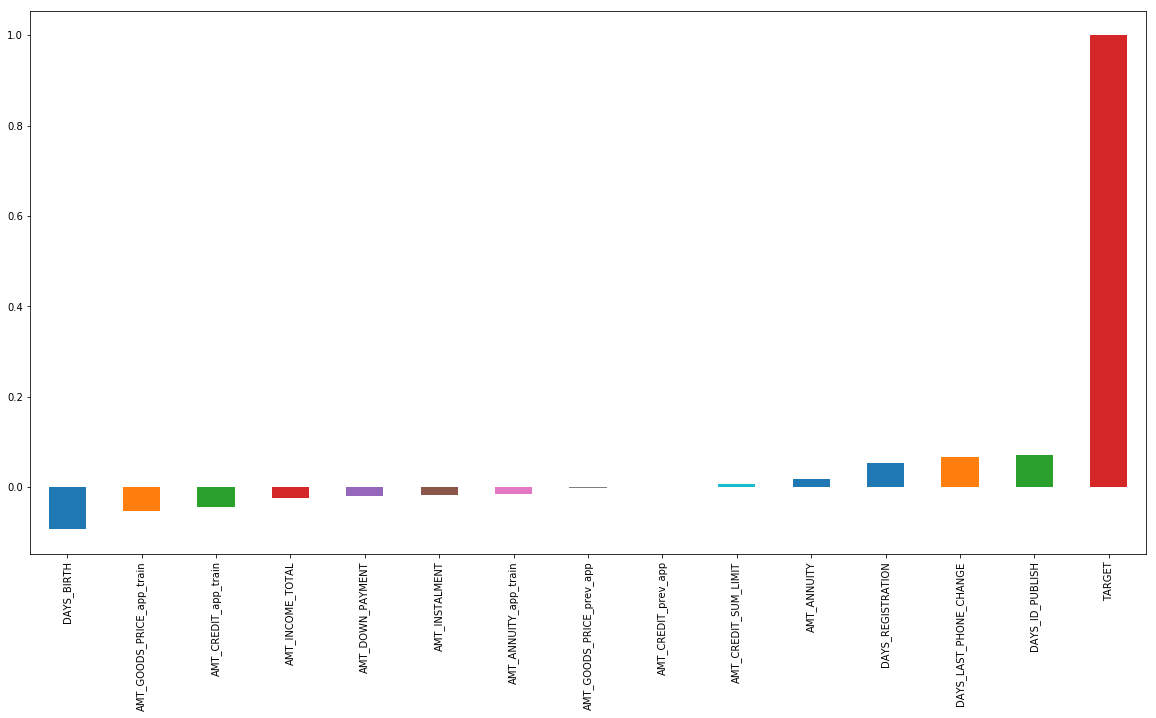

In [4]:
df.DAYS_BIRTH = df.DAYS_BIRTH.apply(lambda x:x/-365)
#Correlation bar chart of all of my features
correlations = df.corr(method='pearson')['TARGET'].sort_values()
plt.figure(figsize=(20,10))
correlations.plot(kind='bar')


# Number of Loan Paid vs Unpaid

On the graph below, the number of applicants who paid back their loan (shown as '0') greatly outweighed the applicants who feel behind (shown as '1'). Industry average for 30+ deliquency rate is 4.3%. This applicant pool is about 7.9%. So there is room for improvement. 

Source: http://www.worldpropertyjournal.com/real-estate-news/united-states/irvine/corelogic-loan-performance-insights-report-june-2018-frank-martell-mortgage-loan-delinquency-rates-serious-delinquent-mortgage-loans-in-2018-real-estate-news-10920.php


0    9225
1     775
Name: TARGET, dtype: int64

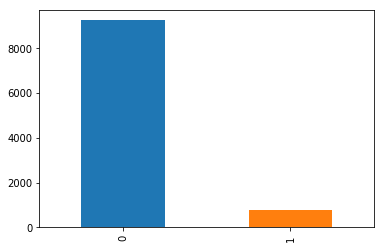

In [5]:
df.TARGET.value_counts().plot(kind='bar')
df.TARGET.value_counts()

# Comparing Incomes by Target Criteria

Lower income tends to typically have more difficulties with loan repayment. If possible, we could look further into the loan approval process. Overall, this helps narrow down the group of loan deliquencies.

count    9.225000e+03
mean     1.681092e+05
std      9.543181e+04
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.935000e+06
Name: AMT_INCOME_TOTAL, dtype: float64
count       775.000000
mean     159588.603871
std       78033.849080
min       36000.000000
25%      112500.000000
50%      135000.000000
75%      189000.000000
max      697500.000000
Name: AMT_INCOME_TOTAL, dtype: float64


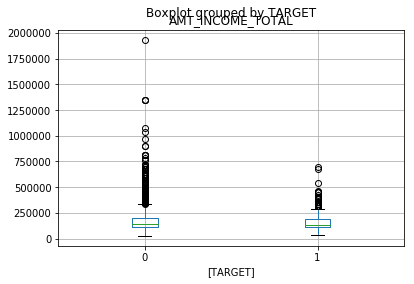

In [6]:

df[['AMT_INCOME_TOTAL','TARGET']].boxplot(by='TARGET')
print(df['AMT_INCOME_TOTAL'][df.TARGET == 0].describe())
print(df['AMT_INCOME_TOTAL'][df.TARGET == 1].describe())

# Scatter Plot between Income and Credit Recieved

While there is a correlation between income and credit, I am quite surprised on how low it is. There could be some situation where tightening of the credit limit could be applied. 

In addition, the orange dots show the loans that were not paid. It seems like this group were given lower loans from the start. Could there have been signs during the applications process that caused them to recieve lower loans? 

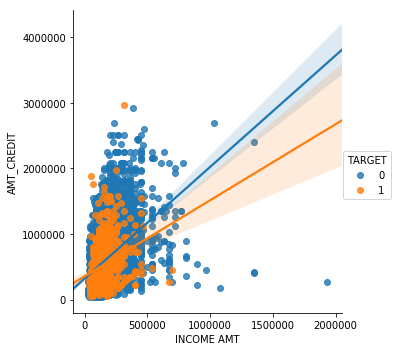

,AMT_INCOME_TOTAL,AMT_CREDIT_app_train
AMT_INCOME_TOTAL,1.000000,0.391627
AMT_CREDIT_app_train,0.391627,1.000000


In [7]:
sns.lmplot('AMT_INCOME_TOTAL','AMT_CREDIT_app_train',df,hue='TARGET')
plt.xlabel('INCOME AMT')
plt.ylabel('AMT_CREDIT')
plt.show()
df[['AMT_INCOME_TOTAL','AMT_CREDIT_app_train']].corr()

# Analysing the spread of Income

The typical US income Q3-Q1 range is about $60K. Home Credit's applicant pool has an income range of $80K. In addition, the typical Q3 for USA incomes are about $90K, while this pool is about $200K. We have a different size of applicants than the typical population of the United States, so majority of the applicants have the means to repay a mortgage. 

count    1.000000e+04
mean     1.674489e+05
std      9.422260e+04
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.935000e+06
Name: AMT_INCOME_TOTAL, dtype: float64


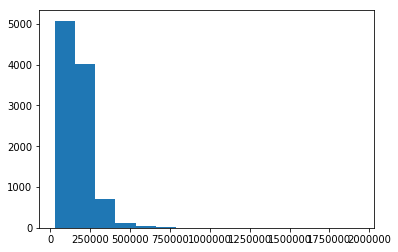

In [8]:
plt.hist(df['AMT_INCOME_TOTAL'],bins=15)
print(df.AMT_INCOME_TOTAL.describe())


# Average Price of Good Purchased with Loan

On average, the target groups both purchased the same priced goods. However, there are differences. 

1. Mean is about 50K lower for '1' group. 
2. Standard Deviation is also 50K lower for group '1'. 

This further shows that this group typically are clustered closer together than group '0'. Potentially, I can use clustering techiniques in the next step to further analyze any possible clusters. 

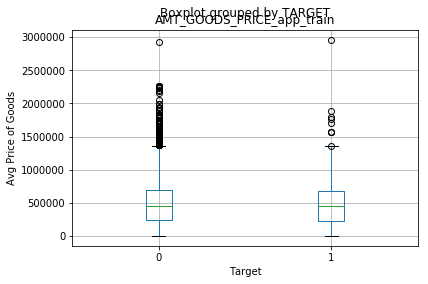

count    9.225000e+03
mean     5.455713e+05
std      3.752162e+05
min      0.000000e+00
25%      2.385000e+05
50%      4.500000e+05
75%      6.885000e+05
max      2.925000e+06
Name: AMT_GOODS_PRICE_app_train, dtype: float64
count    7.750000e+02
mean     4.737716e+05
std      3.097466e+05
min      0.000000e+00
25%      2.250000e+05
50%      4.500000e+05
75%      6.750000e+05
max      2.961000e+06
Name: AMT_GOODS_PRICE_app_train, dtype: float64


In [9]:
df[['AMT_GOODS_PRICE_app_train','TARGET']].boxplot(by='TARGET')
plt.xlabel('Target')
plt.ylabel('Avg Price of Goods')
plt.show()
print(df['AMT_GOODS_PRICE_app_train'][df.TARGET == 0].describe())
print(df['AMT_GOODS_PRICE_app_train'][df.TARGET == 1].describe())

# Histogram of Good Purchased

There seems to be several groups of bins that typically are purchased more often than others. And Group '1' is fairly similar to full dataframe's distribution. 

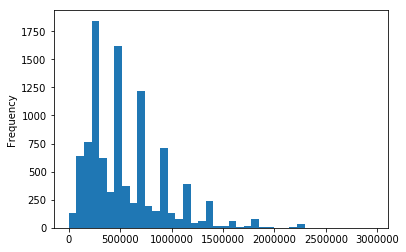

In [10]:
df['AMT_GOODS_PRICE_app_train'].plot(kind='hist',bins=40)

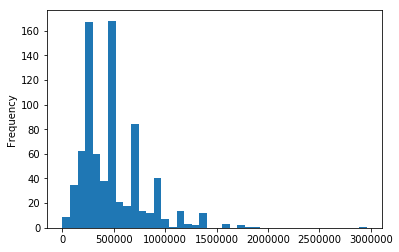

In [11]:
df['AMT_GOODS_PRICE_app_train'][df.TARGET==1].plot(kind='hist',bins=40)

# Correlation Plot between income and Good Price

I wanted to see if income had any correlation with the good purchased. There is a higher correlation between Good Price and Income for applicants that have not had trouble with their loan. 

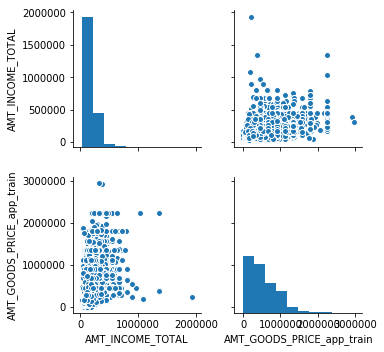

                           AMT_INCOME_TOTAL  AMT_GOODS_PRICE_app_train
AMT_INCOME_TOTAL                   1.000000                   0.275883
AMT_GOODS_PRICE_app_train          0.275883                   1.000000
                           AMT_INCOME_TOTAL  AMT_GOODS_PRICE_app_train
AMT_INCOME_TOTAL                   1.000000                   0.403519
AMT_GOODS_PRICE_app_train          0.403519                   1.000000


In [12]:
sns.pairplot(df[['AMT_INCOME_TOTAL','AMT_GOODS_PRICE_app_train']])
plt.show()
print(df[['AMT_INCOME_TOTAL','AMT_GOODS_PRICE_app_train']][df.TARGET == 1].corr())
print(df[['AMT_INCOME_TOTAL','AMT_GOODS_PRICE_app_train']][df.TARGET == 0].corr())

# Boxplots based on Age and Target

Based on this box plot, younger applicants are more likely to have difficulties with their loan.

Text(0.5,1,'Age by TARGET')

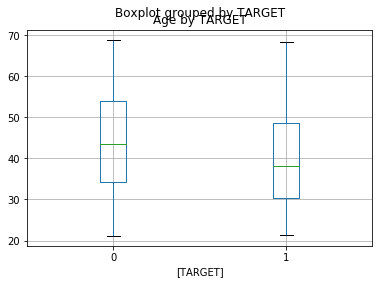

In [13]:

df[['DAYS_BIRTH','TARGET']].boxplot(by='TARGET')
plt.title('Age by TARGET')

# Scatter Plot between Credit and Good Price Purchased

The bank provide consistent credit for the good that was being purchased. We can assume that the applicants used mainly credit to purchase the good. I wonder if any of the outliers on this graph had trouble with paying the loan.  

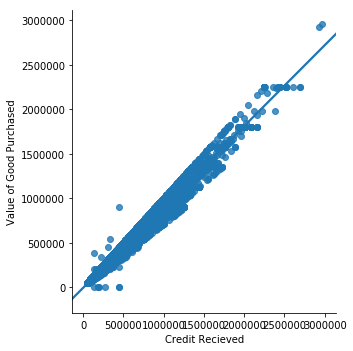

,AMT_CREDIT_app_train,AMT_GOODS_PRICE_app_train
AMT_CREDIT_app_train,1.000000,0.986684
AMT_GOODS_PRICE_app_train,0.986684,1.000000


In [14]:
sns.lmplot('AMT_CREDIT_app_train','AMT_GOODS_PRICE_app_train',df)
plt.xlabel('Credit Recieved')
plt.ylabel('Value of Good Purchased')
plt.show()
df[['AMT_CREDIT_app_train','AMT_GOODS_PRICE_app_train']].corr()

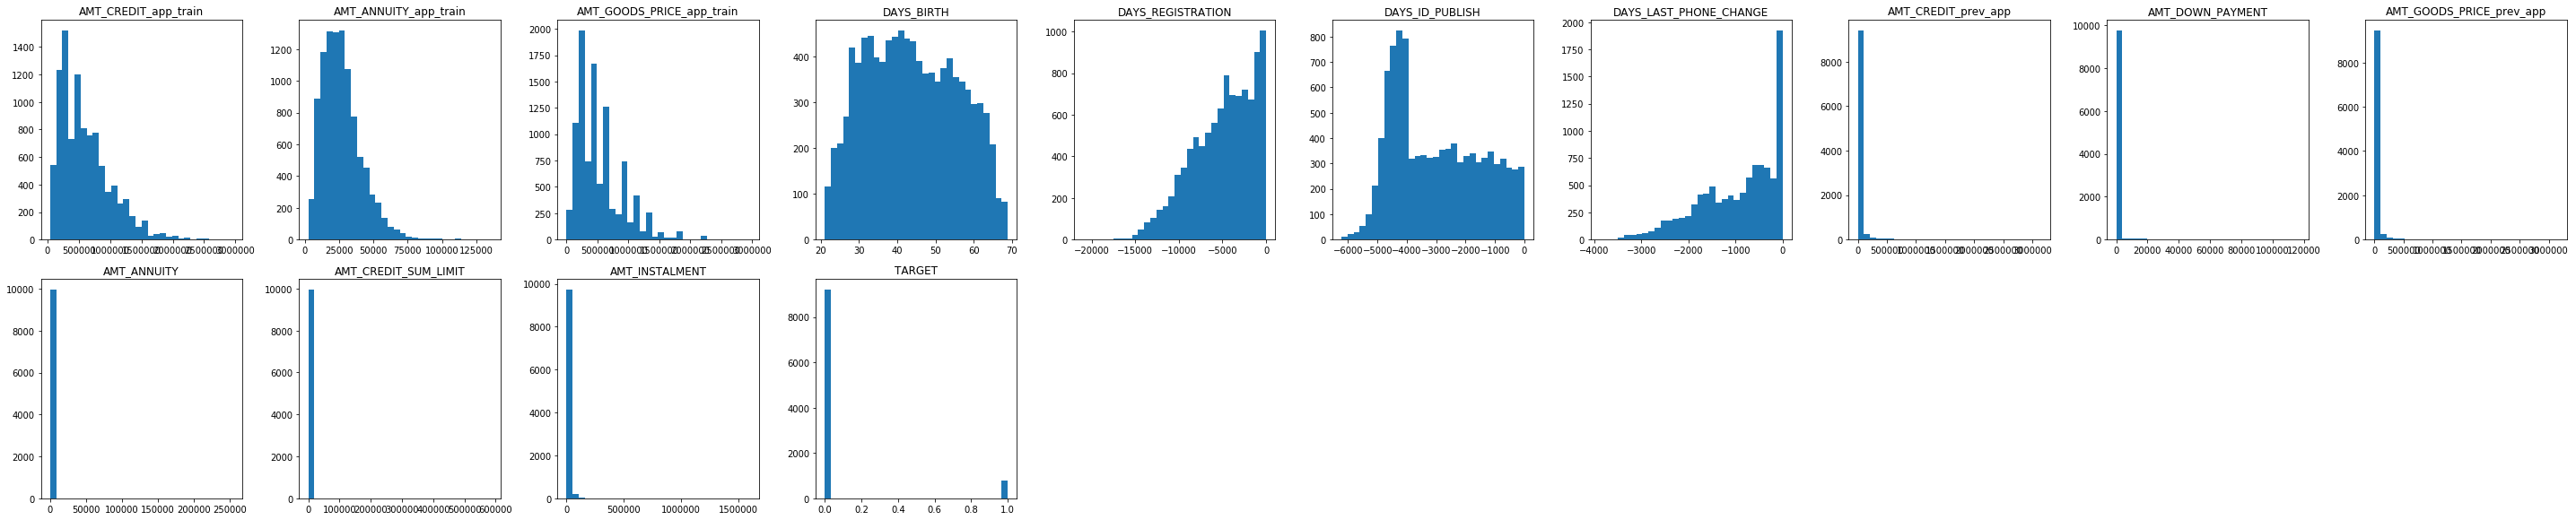

In [15]:
df = df.replace(365423.000000,0.0)
plt.subplots(figsize=(40, 40))
for x in range(1,len(df.columns)):
    plt.subplot(10,10,x)
    plt.hist(df.iloc[:,x-1],bins=30)
   
    plt.title(df.columns[x-1])


# Use plt.tight_layout() to improve the spacing between subplots
plt.tight_layout()

plt.show()

In [16]:
df_corr = df.corr(method='pearson')
df_corr

,AMT_CREDIT_app_train,AMT_ANNUITY_app_train,AMT_GOODS_PRICE_app_train,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT_prev_app,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_prev_app,AMT_ANNUITY,AMT_CREDIT_SUM_LIMIT,AMT_INSTALMENT,TARGET,AMT_INCOME_TOTAL
AMT_CREDIT_app_train,1.000000,0.785932,0.986684,0.091010,-0.010867,-0.039323,-0.070509,0.020590,0.015160,0.021330,0.013616,0.010693,0.063140,-0.044034,0.391627
AMT_ANNUITY_app_train,0.785932,1.000000,0.788763,0.006639,0.026988,-0.015438,-0.064119,0.018366,0.033744,0.020594,0.022853,0.000112,0.054779,-0.015849,0.458479
AMT_GOODS_PRICE_app_train,0.986684,0.788763,1.000000,0.089627,-0.005911,-0.040902,-0.074026,0.019363,0.017212,0.020474,0.012850,0.009835,0.062775,-0.051744,0.397280
DAYS_BIRTH,0.091010,0.006639,0.089627,1.000000,-0.346264,-0.264564,-0.089920,0.036718,-0.015515,0.036139,0.005432,0.006118,0.059245,-0.093312,-0.065008
DAYS_REGISTRATION,-0.010867,0.026988,-0.005911,-0.346264,1.000000,0.118697,0.049033,-0.008077,0.014492,-0.006897,-0.007908,0.015296,-0.018968,0.053231,0.064235
DAYS_ID_PUBLISH,-0.039323,-0.015438,-0.040902,-0.264564,0.118697,1.000000,0.092134,0.020367,0.008402,0.019721,0.002519,-0.009805,-0.020288,0.070535,0.014972
DAYS_LAST_PHONE_CHANGE,-0.070509,-0.064119,-0.074026,-0.089920,0.049033,0.092134,1.000000,-0.029744,-0.024133,-0.025901,-0.013228,-0.002323,-0.048066,0.067106,-0.051416
AMT_CREDIT_prev_app,0.020590,0.018366,0.019363,0.036718,-0.008077,0.020367,-0.029744,1.000000,0.085369,0.986275,-0.002898,-0.007184,0.066481,-0.000296,0.061606
AMT_DOWN_PAYMENT,0.015160,0.033744,0.017212,-0.015515,0.014492,0.008402,-0.024133,0.085369,1.000000,0.115185,0.009729,-0.002927,-0.000067,-0.018206,0.028958
AMT_GOODS_PRICE_prev_app,0.021330,0.020594,0.020474,0.036139,-0.006897,0.019721,-0.025901,0.986275,0.115185,1.000000,-0.002369,-0.006998,0.063349,-0.002306,0.061041


# Statistical Analysis on High Correlation against Target

1. DAYS_ID_PUBLISH
2. DAYS_LAST_PHONE_CHANGE
3. DAYS_REGISTRATION
4. DAYS_BIRTH

count    9225.000000
mean    -3014.301572
std      1508.327860
min     -6228.000000
25%     -4311.000000
50%     -3286.000000
75%     -1751.000000
max         0.000000
Name: DAYS_ID_PUBLISH, dtype: float64
count     775.000000
mean    -2615.323871
std      1514.659894
min     -5603.000000
25%     -4032.500000
50%     -2627.000000
75%     -1289.000000
max       -10.000000
Name: DAYS_ID_PUBLISH, dtype: float64


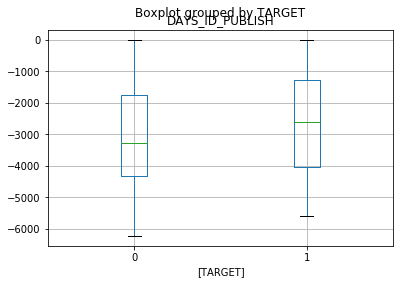

In [17]:

df[['DAYS_ID_PUBLISH','TARGET']].boxplot(by='TARGET')
print(df['DAYS_ID_PUBLISH'][df.TARGET == 0].describe())
print(df['DAYS_ID_PUBLISH'][df.TARGET == 1].describe())

count    9225.000000
mean     -976.287480
std       831.404999
min     -3882.000000
25%     -1576.000000
50%      -776.000000
75%      -273.000000
max         0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64
count     775.000000
mean     -768.797419
std       743.800133
min     -3235.000000
25%     -1214.500000
50%      -566.000000
75%      -146.000000
max         0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


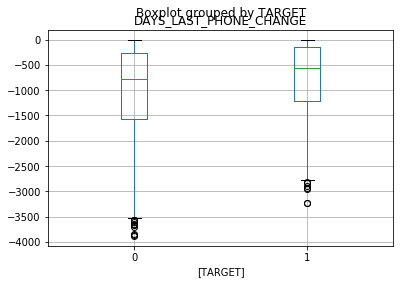

In [18]:

df[['DAYS_LAST_PHONE_CHANGE','TARGET']].boxplot(by='TARGET')
print(df['DAYS_LAST_PHONE_CHANGE'][df.TARGET == 0].describe())
print(df['DAYS_LAST_PHONE_CHANGE'][df.TARGET == 1].describe())

count    9.225000e+03
mean     5.455713e+05
std      3.752162e+05
min      0.000000e+00
25%      2.385000e+05
50%      4.500000e+05
75%      6.885000e+05
max      2.925000e+06
Name: AMT_GOODS_PRICE_app_train, dtype: float64
count    7.750000e+02
mean     4.737716e+05
std      3.097466e+05
min      0.000000e+00
25%      2.250000e+05
50%      4.500000e+05
75%      6.750000e+05
max      2.961000e+06
Name: AMT_GOODS_PRICE_app_train, dtype: float64


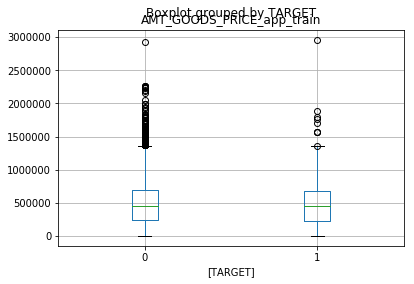

In [19]:
df[['AMT_GOODS_PRICE_app_train','TARGET']].boxplot(by='TARGET')
print(df['AMT_GOODS_PRICE_app_train'][df.TARGET == 0].describe())
print(df['AMT_GOODS_PRICE_app_train'][df.TARGET == 1].describe())

count    9225.000000
mean       44.226472
std        11.856384
min        21.109589
25%        34.334247
50%        43.613699
75%        53.997260
max        68.931507
Name: DAYS_BIRTH, dtype: float64
count    775.000000
mean      40.076613
std       11.650409
min       21.268493
25%       30.465753
50%       38.071233
75%       48.669863
max       68.446575
Name: DAYS_BIRTH, dtype: float64


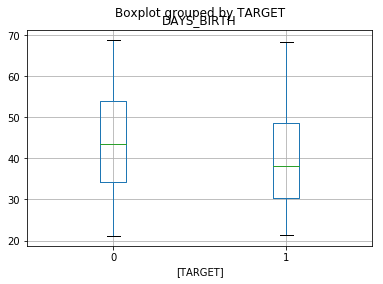

In [20]:
df[['DAYS_BIRTH','TARGET']].boxplot(by='TARGET')
print(df['DAYS_BIRTH'][df.TARGET == 0].describe())
print(df['DAYS_BIRTH'][df.TARGET == 1].describe())

According to this graph, younger population tends to be deliquent, but the range between the two groups are the same.

## Correlation Graph of All Columns

Positive Correlation:
    1. AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, and AMT_INCOME
    2. AMT_INSTALMENT, AMT_GOODS_PRICE, AMT_CREDIT, AMT_ANNUITY

Slightly Negative Correlation:
    1. TARGET against AMT_CREDIT, AMT_ANNUITY, and AMT_GOODS_PRICE.
    2. DAYS_BIRTH against AMT_CREDIT and AMT_GOODS_PRICE. 


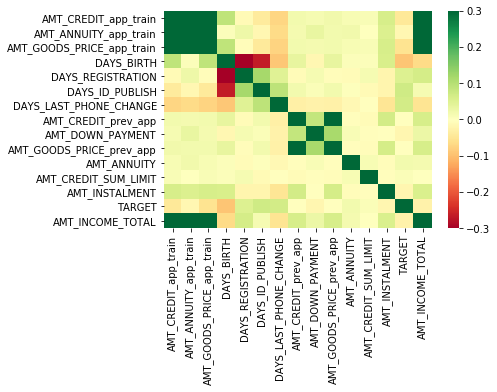

In [21]:
import seaborn as sns
ax = sns.heatmap(df.corr(method='pearson'),cmap="RdYlGn",vmax=.3,vmin=-.3)